
# K-MEANS V07 //  WHOLE MELB ADDRESS SCORES CSV //  MULTIPLE CLUSTERS
**MACAD + AIA SEMESTER**

**STUDIO SEMINAR: ARTIFCIAL INTELLIGENCE IN ARCHITECTURE**


---


 

**SENIOR FACULTY**: Angelos Chronis

**TUTOR**: Lea Khairallah



**STUDENTS**: Aleksander Mastalski + Amar Gurung + Felipe Romero + Amal Algamdey + German Otto Bodenbender

**SITE**: [URBAN VOIDS SITE](https://city-lab.wixsite.com/urbanvoids)

## 01 // IMPORT LIBRARIES & LOAD DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

import seaborn as sb
import random

from scipy.spatial.distance import cdist 
import scipy.cluster.hierarchy as shc
from yellowbrick.cluster import KElbowVisualizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

import pandas as pd
import keras as ke

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Mounted at /content/drive


In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/DATASETS/STUDIO/V03_whole_melbourne_address_scores_bus_railway.csv')
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117357 entries, 0 to 117356
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   element_type                      117357 non-null  object 
 1   osmid                             117357 non-null  int64  
 2   name                              8394 non-null    object 
 3   amenity                           3943 non-null    object 
 4   geometry                          117357 non-null  object 
 5   x                                 117357 non-null  float64
 6   y                                 117357 non-null  float64
 7   node_ids                          117357 non-null  int64  
 8   bus_stops_avg_score_of_2          117357 non-null  int64  
 9   railway_stations_avg_score_of_2   117357 non-null  int64  
 10  primary_education_avg_score_of_4  117357 non-null  int64  
 11  higher_education_avg_score_of_4   117357 non-null  i

In [ ]:
raw_data.head(2)

,element_type,osmid,name,amenity,geometry,x,y,node_ids,bus_stops_avg_score_of_2,railway_stations_avg_score_of_2,primary_education_avg_score_of_4,higher_education_avg_score_of_4,hospital_avg_score_of_2,spec_healthcare_avg_score_of_8,pharmacy_avg_score_of_2,food_avg_score_of_8,nightlife_avg_score_of_8,entertainment_avg_score_of_8,sport_facility_avg_score_of_8,green_area_avg_score_of_2,bbq_area_avg_score_of_8,place_of_worship_avg_score_of_4,tourism_avg_score_of_8
0,node,445411877,Grand Hotel,pub,POINT (335301.4824392713 5776405.522327629),335301.482439,5.776406e+06,194082,90,1,3,1,1,19,85,93,64,8,1,9,76,35,82
1,node,445411879,Flannigans,pub,POINT (335246.6487953566 5776432.530760607),335246.648795,5.776433e+06,350232,90,1,3,1,1,19,85,93,64,8,1,9,76,35,83


In [ ]:
transport_data = raw_data[['bus_stops_avg_score_of_2', 'railway_stations_avg_score_of_2']]
health_data = raw_data[['spec_healthcare_avg_score_of_8', 'pharmacy_avg_score_of_2']]
educ_data = raw_data[['primary_education_avg_score_of_4', 'higher_education_avg_score_of_4']]
food_entre_data = raw_data[['food_avg_score_of_8', 'nightlife_avg_score_of_8', 'entertainment_avg_score_of_8', 'bbq_area_avg_score_of_8']]
recre_data = raw_data[['sport_facility_avg_score_of_8', 'green_area_avg_score_of_2', 'tourism_avg_score_of_8']]

,spec_healthcare_avg_score_of_8,pharmacy_avg_score_of_2
0,19,85
1,19,85
2,1,1
3,21,78
4,20,73


In [ ]:
transport_data 
health_data
educ_data
food_entre_data
recre_data

In [ ]:
X = recre_data
print(X.head(3))
ss = StandardScaler()
X = ss.fit_transform(X)
X

   sport_facility_avg_score_of_8  ...  tourism_avg_score_of_8
0                              1  ...                      82
1                              1  ...                      83
2                              1  ...                       3

[3 rows x 3 columns]


array([[-1.20224835, -0.33327847,  1.96791493],
       [-1.20224835, -0.33327847,  2.0134425 ],
       [-1.20224835, -0.81681296, -1.62876275],
       ...,
       [-0.25909739, -0.81681296, -1.31006979],
       [-1.08435448, -0.81681296, -1.35559736],
       [-1.20224835, -0.81681296, -1.71981789]])

## 02 // PLOT AND TEST DATA

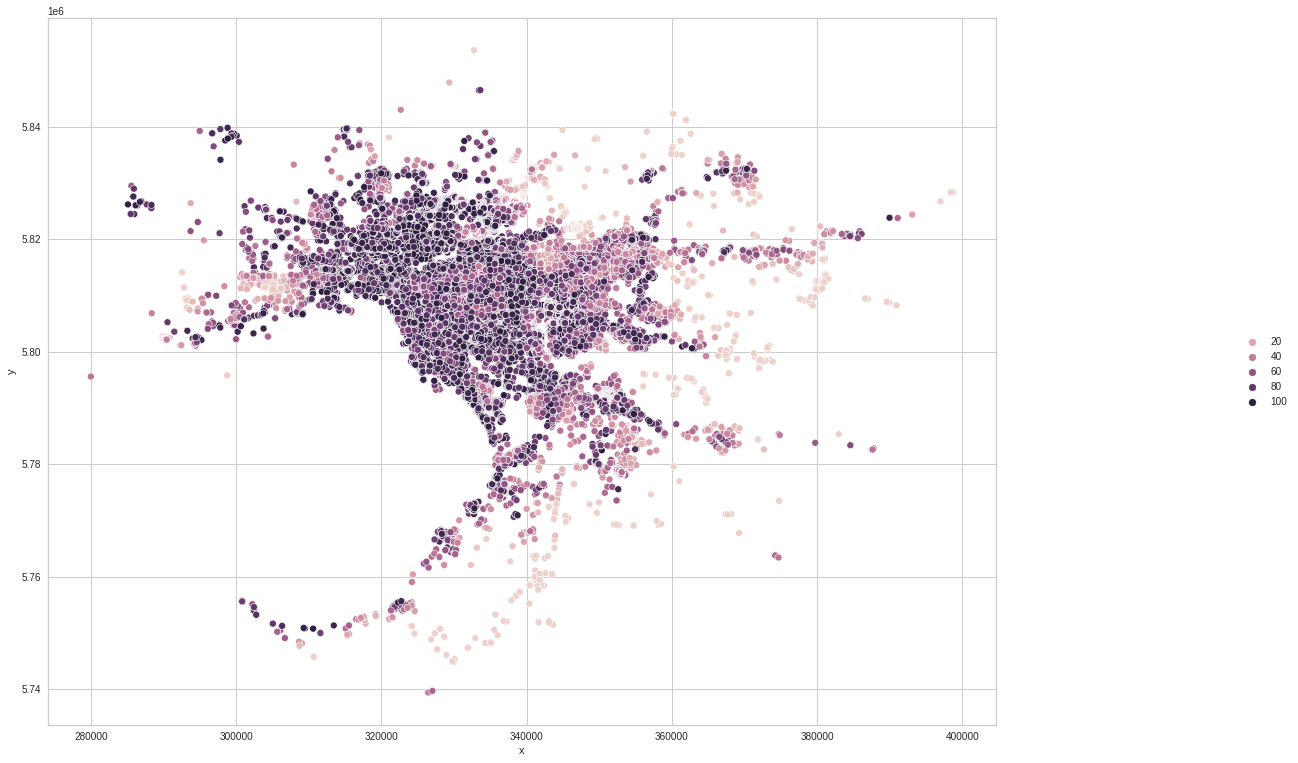

In [ ]:
fig_dims = (17, 13)
fig, ax = plt.subplots(figsize=fig_dims)

#Plot Hue's
#g = sb.scatterplot(x="x", y="y", hue="amenity", ax=ax, data=raw_data)

#Plot wihthout hues and see the full sample
g = sb.scatterplot(x="x", y="y", ax=ax, data=raw_data, hue='node')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

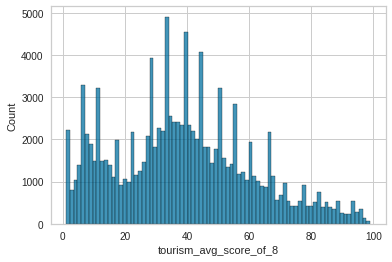

In [ ]:
sb.histplot(data=raw_data, x='tourism_avg_score_of_8')

In [ ]:
class MyKMeansClustering():
    def __init__(self, k=2):
        self.k = k

    def fit(self, X, max_num_iterattions=600, treshold = 0.001):

        self.centroids = {}
        
        # Initialize Centroids
        for i in range(self.k):
            self.centroids[i] = X[i]

        for i in range(max_num_iterattions):
            
            # Initialize Clusters
            self.clusters = {}
            for i in range(self.k):
                self.clusters[i] = []
            
            # Euclidian distance for each point
            for sample in X:
                distances = [np.linalg.norm(sample-self.centroids[centroid]) for centroid in self.centroids]
                cluster = distances.index(min(distances))
                self.clusters[cluster].append(sample)

            # Update centroids
            previous_centroids = dict(self.centroids)
            for cluster in self.clusters:
                self.centroids[cluster] = np.average(self.clusters[cluster], axis=0)

            # Check if centroids changed
            centroids_changed = True
            
            for centroid in self.centroids:
                difference = np.sum((self.centroids[centroid] - previous_centroids[centroid])/
                             previous_centroids[centroid]*100.0)               
                if  difference > treshold:
                    centroids_changed = False

            if centroids_changed:
                break

    def predict(self, sample):
        distances = [np.linalg.norm(sample - self.centroids[centroid]) for centroid in self.centroids]
        cluster = distances.index(min(distances))
        return cluster

## 03 // ELBOW METHOD

In [ ]:
sse = []
k_rng = range(1,20)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

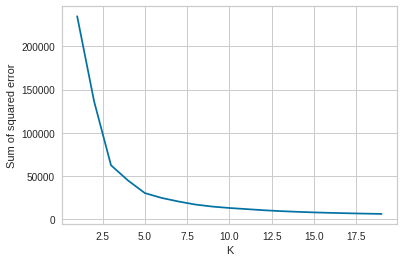

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## 04 // TRAIN K-MEANS

In [ ]:
k_num = 5

kmeans = KMeans(n_clusters=k_num, n_init=200, random_state=100)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([0, 0, 3, ..., 3, 3, 3], dtype=int32)

In [ ]:
#Add clusters values to the data
raw_data['recre_sports_cluster_values'] = y_kmeans
raw_data.head(5)

,element_type,osmid,name,amenity,geometry,x,y,node_ids,bus_stops_avg_score_of_2,railway_stations_avg_score_of_2,primary_education_avg_score_of_4,higher_education_avg_score_of_4,hospital_avg_score_of_2,spec_healthcare_avg_score_of_8,pharmacy_avg_score_of_2,food_avg_score_of_8,nightlife_avg_score_of_8,entertainment_avg_score_of_8,sport_facility_avg_score_of_8,green_area_avg_score_of_2,bbq_area_avg_score_of_8,place_of_worship_avg_score_of_4,tourism_avg_score_of_8,transport_cluster_values,health_cluster_values,educ_cluster_values,food_enter_cluster_values,recre_sports_cluster_values
0,node,445411877,Grand Hotel,pub,POINT (335301.4824392713 5776405.522327629),335301.482439,5.776406e+06,194082,90,1,3,1,1,19,85,93,64,8,1,9,76,35,82,4,0,3,4,0
1,node,445411879,Flannigans,pub,POINT (335246.6487953566 5776432.530760607),335246.648795,5.776433e+06,350232,90,1,3,1,1,19,85,93,64,8,1,9,76,35,83,4,0,3,4,0
2,node,1247896827,St. Andrews Somerville,place_of_worship,POINT (340185.6385557596 5767839.151220039),340185.638556,5.767839e+06,284549,55,46,35,1,1,1,1,23,3,1,1,1,1,43,3,0,2,0,2,3
3,node,1253933418,NaN,NaN,POINT (335927.608412708 5777417.538520833),335927.608413,5.777418e+06,310745,100,6,8,1,1,21,78,77,48,6,1,9,44,33,62,4,0,3,4,0
4,node,1253939235,NaN,NaN,POINT (335912.0477349205 5777421.742682684),335912.047735,5.777422e+06,60842,96,7,8,1,1,20,73,74,44,5,1,8,40,31,59,4,0,3,4,0


In [ ]:
raw_data.to_csv('clustered_data.csv')

In [ ]:
#find the centroid
centers = np.array(kmeans.cluster_centers_)
centers
X = ss.fit_transform(X)
centroid = pd.DataFrame(centers)
centroid

,0,1,2
0,-0.642887,-0.429380,0.167279
1,2.360958,1.292642,1.791992
2,0.832922,-0.147540,0.431860
3,-0.369802,-0.622361,-1.104685
4,-0.016523,1.633734,0.572730


## 05 // PLOT CLUSTERS

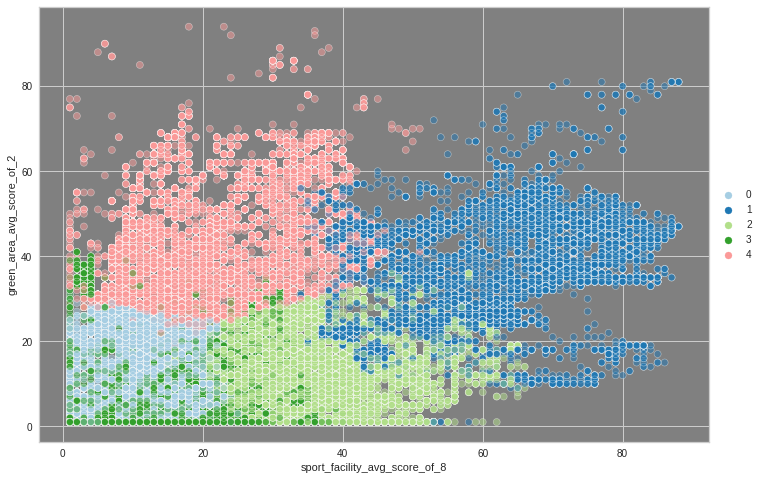

In [ ]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
palette = sb.color_palette("Paired", k_num)
ax.set_facecolor('grey')

g = sb.scatterplot(x="sport_facility_avg_score_of_8", y="green_area_avg_score_of_2", palette=palette, legend='full', hue="recreation_cluster_values", ax=ax, data=raw_data, alpha=.5)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)



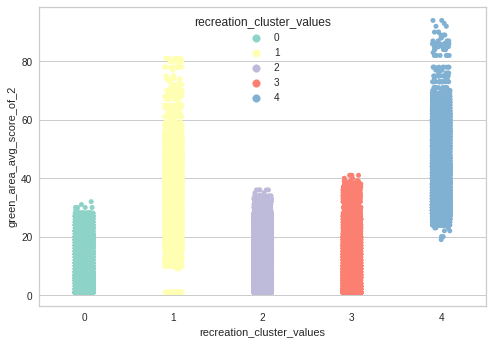

In [ ]:
a1 = sb.stripplot(x="recreation_cluster_values", y="green_area_avg_score_of_2", hue="recreation_cluster_values", data=raw_data, palette="Set3")

In [ ]:
PARALLEL COORDINATES

In [ ]:
import plotly.express as px
df = raw_data[['sport_facility_avg_score_of_8', 'green_area_avg_score_of_2', 'tourism_avg_score_of_8', 'recreation_cluster_values']]
fig = px.parallel_coordinates(df, color="recreation_cluster_values", labels={'sport_facility_avg_score_of_8', 'green_area_avg_score_of_2', 'tourism_avg_score_of_8'},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [ ]:
function_filter = raw_data[raw_data["cluster_values"]==3]
cl_3 = raw_data.loc[raw_data.loc[:,'cluster_values']==3]

In [ ]:
raw_data.head(3)

,element_type,osmid,name,amenity,geometry,x,y,node_ids,bus_stops_avg_score_of_2,railway_stations_avg_score_of_2,primary_education_avg_score_of_4,higher_education_avg_score_of_4,hospital_avg_score_of_2,spec_healthcare_avg_score_of_8,pharmacy_avg_score_of_2,food_avg_score_of_8,nightlife_avg_score_of_8,entertainment_avg_score_of_8,sport_facility_avg_score_of_8,green_area_avg_score_of_2,bbq_area_avg_score_of_8,place_of_worship_avg_score_of_4,tourism_avg_score_of_8,recreation_cluster_values
0,node,445411877,Grand Hotel,pub,POINT (335301.4824392713 5776405.522327629),335301.482439,5.776406e+06,194082,90,1,3,1,1,19,85,93,64,8,1,9,76,35,82,0
1,node,445411879,Flannigans,pub,POINT (335246.6487953566 5776432.530760607),335246.648795,5.776433e+06,350232,90,1,3,1,1,19,85,93,64,8,1,9,76,35,83,0
2,node,1247896827,St. Andrews Somerville,place_of_worship,POINT (340185.6385557596 5767839.151220039),340185.638556,5.767839e+06,284549,55,46,35,1,1,1,1,23,3,1,1,1,1,43,3,3


In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/DATASETS/STUDIO/DATASETS-CARTO/melbourne_for_plot.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
raw_data.info

<bound method DataFrame.info of         Unnamed: 0       city  ...  recre_cluster_values  Unnamed: 25
0                0  Melbourne  ...                     7          NaN
1                1  Melbourne  ...                     7          NaN
2                2  Melbourne  ...                     6          NaN
3                3  Melbourne  ...                     7          NaN
4                4  Melbourne  ...                     7          NaN
...            ...        ...  ...                   ...          ...
117356      117356  Melbourne  ...                     6          NaN
117357      117357  Melbourne  ...                     6          NaN
117358      117358  Melbourne  ...                     6          NaN
117359      117359  Melbourne  ...                     6          NaN
117360      117360  Melbourne  ...                     6          NaN

[117361 rows x 26 columns]>

In [ ]:
raw_data.head(3)

,Unnamed: 0,city,x,y,name,bus_stops_avg_score_of_2,railway_stations_avg_score_of_2,primary_education_avg_score_of_4,higher_education_avg_score_of_4,hospital_avg_score_of_2,spec_healthcare_avg_score_of_8,pharmacy_avg_score_of_2,food_avg_score_of_8,nightlife_avg_score_of_8,entertainment_avg_score_of_8,sport_facility_avg_score_of_8,green_area_avg_score_of_2,bbq_area_avg_score_of_8,place_of_worship_avg_score_of_4,tourism_avg_score_of_8,trans_cluster_values,health_cluster_values,educ_cluster_values,food_ent_cluster_values,recre_cluster_values,Unnamed: 25
0,0,Melbourne,145.120474,-38.145201,Grand Hotel,90,1,3,1,1,19,85,93,64,8,1,9,76,35,82,7,8,6,9,7,NaN
1,1,Melbourne,145.119855,-38.144948,Flannigans,90,1,3,1,1,19,85,93,64,8,1,9,76,35,83,7,8,6,9,7,NaN
2,2,Melbourne,145.174260,-38.223246,St. Andrews Somerville,55,46,35,1,1,1,1,23,3,1,1,1,1,43,3,8,6,7,6,6,NaN


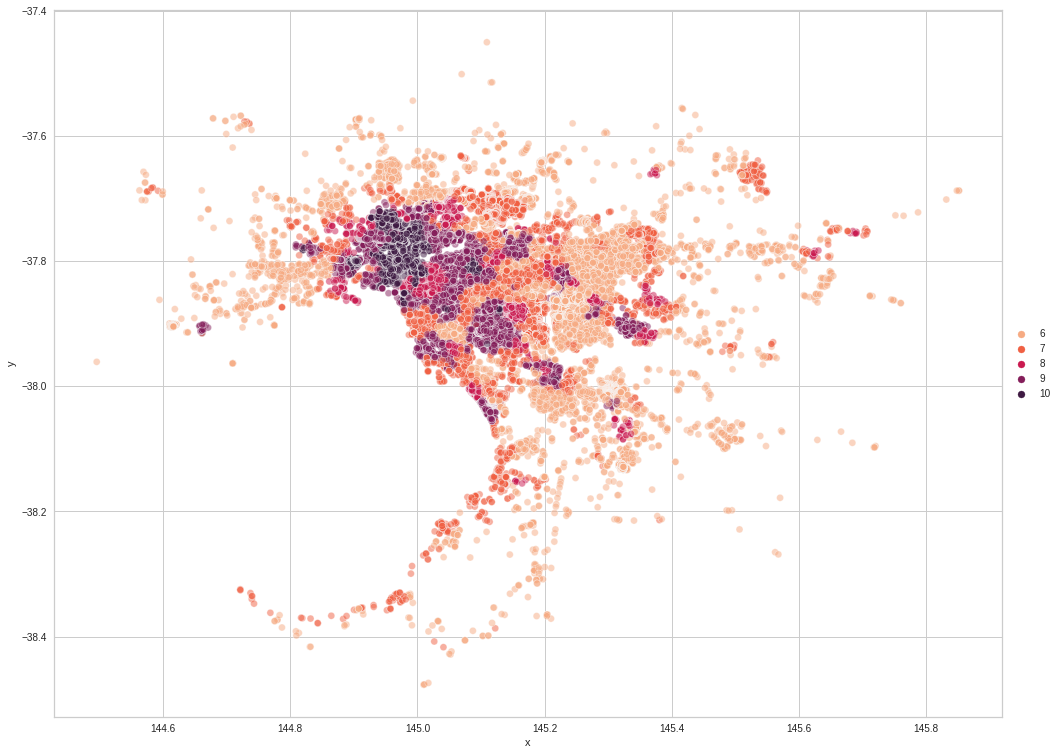

In [ ]:
fig_dims = (17, 13)
k_num = 5

fig, ax = plt.subplots(figsize=fig_dims)
palette = sb.color_palette("rocket_r", k_num)
ax.set_facecolor('white')

p = sb.scatterplot(x="x", y="y", palette=palette, legend='full', hue="recre_cluster_values", ax=ax, data=raw_data, alpha=.5)
#p = sb.scatterplot(x="latitude", y="longitude", palette=palette, legend='full', color="green", ax=ax, data=function_filter, alpha=.5)
p.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



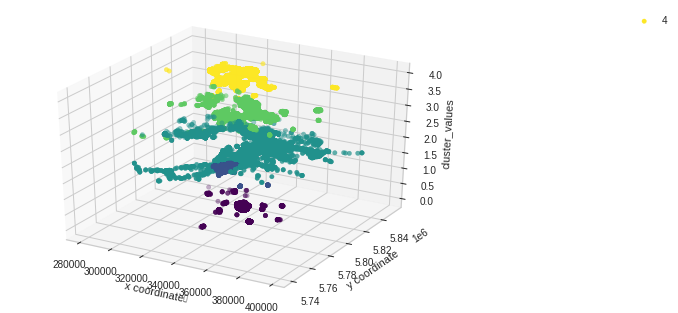

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
from matplotlib import animation

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = raw_data["x"]
y = raw_data["y"]
z = raw_data["food_cluster_values"]

ax.set_xlabel("x coordinate	")
ax.set_ylabel("y coordinate")
ax.set_zlabel("cluster_values")

ax.scatter(x, y, z, cmap=plt.cm.viridis, c=raw_data['food_cluster_values'])
plt.legend(z, bbox_to_anchor = (1.5, 1))
plt.show()

In [ ]:
def animate(frame):
  ax.view_init(30, frame/4)
  plt.pause(.001)
  return fig

anim = animation.FuncAnimation(fig, animate, frames=200, interval=50)
HTML(anim.to_html5_video())

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)
